In [1]:
#Import required libraries
import struct as st 
import numpy as np
import keras
import matplotlib.pyplot as plt
import tensorflow.keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [2]:
#Import dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(type(x_train))
print('Train set of images are 3D array',x_train.shape)# 60000 of images in train set,sized by 28x28 pixals
print('Test set of images are 3D array',x_test.shape)# 10000 of images in test set

<class 'numpy.ndarray'>
Train set of images are 3D array (60000, 28, 28)
Test set of images are 3D array (10000, 28, 28)


In [3]:
# Reshape to the expected CNN format 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')


In [4]:
# scaling images to make gradient descent process faster
x_train=x_train/255
x_test=x_test/255

print(x_train[1].shape)

(28, 28, 1)


In [5]:
# encoding categorical variables
y_train = kr.utils.to_categorical(y_train, 10)
y_test = kr.utils.to_categorical(y_test, 10)

 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


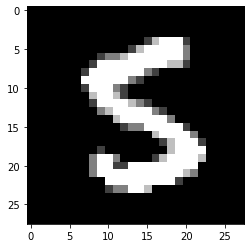

In [6]:
print(' 0, 1, 2, 3, 4, 5, 6, 7, 8, 9')
print(y_test[132])
plt.imshow(x_test[132].reshape(28, 28), cmap='gray')

In [8]:
#Initialising the CNN
model = Sequential()
#  Implements the forward propagation for the model:
#   CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED

# Convolution layer
model.add(Conv2D(32,(3,3),strides=(1, 1),input_shape = (x_train.shape[1],x_train.shape[2],1),activation = 'relu',padding='same'))

# Pooling as reducing feature map
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# Apply 64 filters sized of (3x3) on 2nd convolution layer
model.add(Conv2D(64,kernel_size=(3,3),strides=(1, 1),activation = 'relu',padding='same')) 
          
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Dropout(0.5))

# Flattening
model.add(Flatten())

# Full connection
model.add(Dense(model.output_shape[1],activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [9]:
# Compiling of the Model
model.compile( optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 3136)              9

In [18]:
# Train the model
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 145s 482ms/step - loss: 0.0133 - accuracy: 0.9953 - val_loss: 0.0238 - val_accuracy: 0.9929
Epoch 2/10
300/300 [==============================] - 146s 487ms/step - loss: 0.0139 - accuracy: 0.9952 - val_loss: 0.0259 - val_accuracy: 0.9926
Epoch 3/10
300/300 [==============================] - 145s 483ms/step - loss: 0.0127 - accuracy: 0.9958 - val_loss: 0.0218 - val_accuracy: 0.9929
Epoch 4/10
300/300 [==============================] - 150s 499ms/step - loss: 0.0098 - accuracy: 0.9966 - val_loss: 0.0250 - val_accuracy: 0.9930
Epoch 5/10
300/300 [==============================] - 144s 479ms/step - loss: 0.0119 - accuracy: 0.9958 - val_loss: 0.0211 - val_accuracy: 0.9931
Epoch 6/10
300/300 [==============================] - 151s 502ms/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.0291 - val_accuracy: 0.9919
Epoch 7/10
300/300 [==============================] - 154s 513ms/step - loss: 0.0083 - accuracy: 0.9972 - val_loss: 0.0215 -

In [19]:
# Evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.025847800076007843, 0.9930999875068665]


In [12]:
# save everything to h5 file format
model.save('./model/model.h5')

In [13]:
from tensorflow.keras.models import load_model

In [14]:
# load already compiled model
load_model = load_model('./model/model.h5')

C:\Users\shwetha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


---------------  0, 1, 2, 3, 4, 5, 6, 7, 8, 9
Actual label :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Predicted class :  [6]


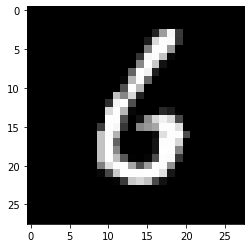

In [15]:
predict_img = load_model.predict_classes(x_test[50].reshape(-1,28,28,1))

plt.imshow(x_test[50].reshape(28, 28), cmap='gray')
print('---------------  0, 1, 2, 3, 4, 5, 6, 7, 8, 9',)
print('Actual label : ', y_test[50])
print('Predicted class : ',predict_img)